## Ejercicio 3: Comparar muestras de una Normal 

In [1]:
import numpy as np
from scipy.stats import norm, chi2_contingency, ks_2samp

# Parámetros de la distribución normal
mu = 0      # Media
sigma = 1   # Desviación estándar
N = 1000    # Tamaño de la muestra

In [2]:
# Generar la muestra teórica usando scipy.stats
teorica_muestra = norm.rvs(loc=mu, scale=sigma, size=N)

In [ ]:
# Generar la muestra empírica usando el método de la transformada inversa

from Generator import generator

def ffinv(y, mu, sigma):
    return norm.ppf(y, loc=mu, scale=sigma) # La función punto porcentual (ppf) es la inversa de la función de distribución acumulada (cdf)

def finv(y):
    return ffinv(y, mu, sigma)

empirica_muestra = generator(finv, N)

### Chi-Cuadrado

In [4]:
# Crear una tabla de frecuencias de observación para cada muestra
teorica_counts, bins = np.histogram(teorica_muestra, bins='auto', density=False)
empirica_counts, _ = np.histogram(empirica_muestra, bins=bins, density=False)

# Realizar la prueba de Chi Cuadrado
chi2_stat, p_val_chi2, dof, expected = chi2_contingency([teorica_counts, empirica_counts])

print("Prueba de Chi Cuadrado")
print(f"Estadística de Chi Cuadrado: {chi2_stat}")
print(f"p-valor: {p_val_chi2}")


# Conclusión basada en un nivel de significancia α = 0.05
if p_val_chi2 > 0.05:
    print("\nConclusión de Chi Cuadrado: No se rechaza la hipótesis nula; las muestras no presentan una diferencia significativa.")
else:
    print("\nConclusión de Chi Cuadrado: Se rechaza la hipótesis nula; las muestras presentan una diferencia significativa.")

Prueba de Chi Cuadrado
Estadística de Chi Cuadrado: 15.330669544130298
p-valor: 0.88239188739038

Conclusión de Chi Cuadrado: No se rechaza la hipótesis nula; las muestras no presentan una diferencia significativa.


### Kolmogorov-Smirnov

In [5]:
ks_stat, p_val_ks = ks_2samp(teorica_muestra, empirica_muestra)

print("\nPrueba de Kolmogorov-Smirnov")
print(f"Estadística KS: {ks_stat}")
print(f"p-valor: {p_val_ks}")

# Conclusión basada en un nivel de significancia α = 0.05
if p_val_ks > 0.05:
    print("\nConclusión de Kolmogorov-Smirnov: No se rechaza la hipótesis nula; las muestras no presentan una diferencia significativa.")
else:
    print("\nConclusión de Kolmogorov-Smirnov: Se rechaza la hipótesis nula; las muestras presentan una diferencia significativa.")


Prueba de Kolmogorov-Smirnov
Estadística KS: 0.033
p-valor: 0.647814872077161

Conclusión de Kolmogorov-Smirnov: No se rechaza la hipótesis nula; las muestras no presentan una diferencia significativa.


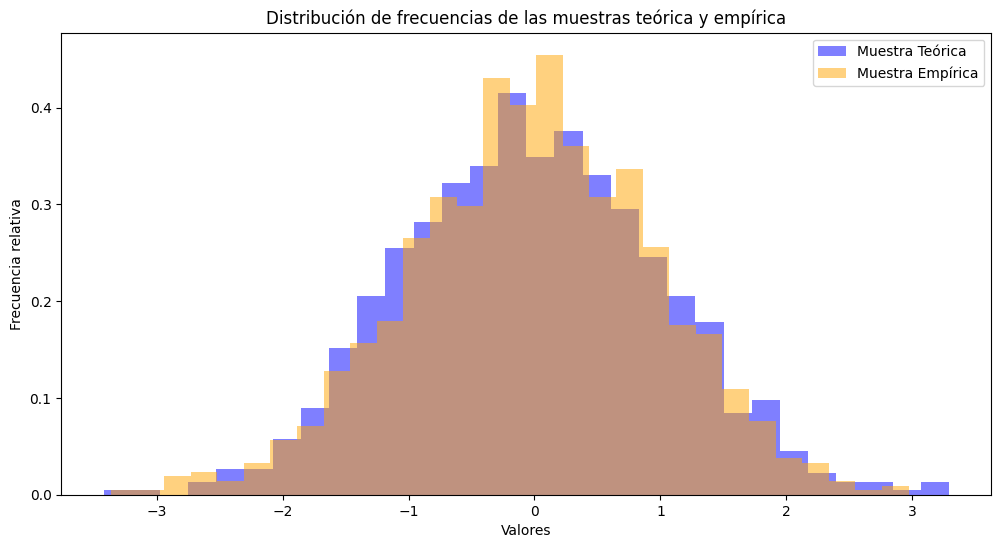

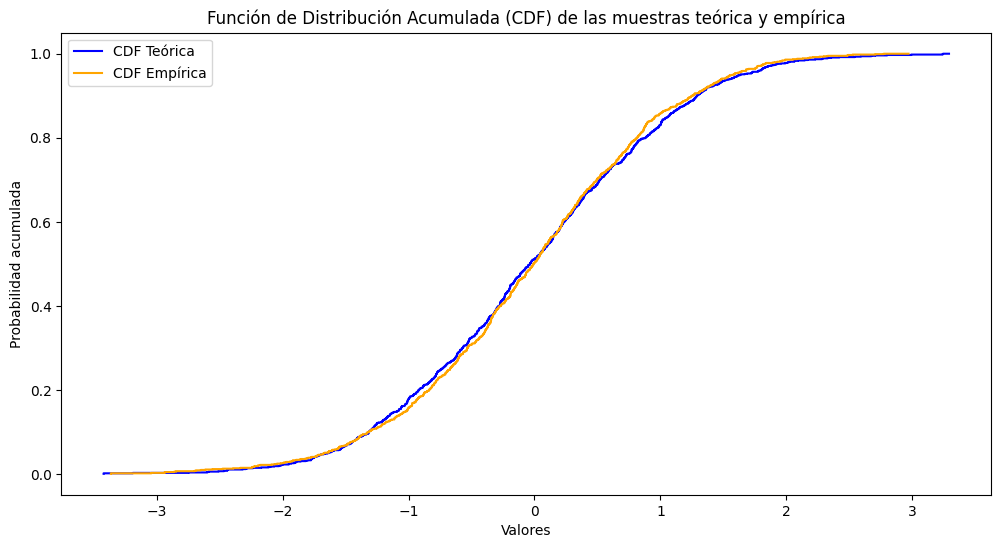

In [7]:
import matplotlib.pyplot as plt

# Gráfico 1: Distribución de frecuencias (histograma) para ambas muestras
plt.figure(figsize=(12, 6))
plt.hist(teorica_muestra, bins=30, alpha=0.5, label='Muestra Teórica', color='blue', density=True)
plt.hist(empirica_muestra, bins=30, alpha=0.5, label='Muestra Empírica', color='orange', density=True)
plt.xlabel("Valores")
plt.ylabel("Frecuencia relativa")
plt.title("Distribución de frecuencias de las muestras teórica y empírica")
plt.legend()
plt.show()

# Gráfico 2: Función de Distribución Acumulativa (CDF) para ambas muestras
sorted_teorica = np.sort(teorica_muestra)
sorted_empirica = np.sort(empirica_muestra)
cdf_teorica = np.arange(1, N + 1) / N
cdf_empirica = np.arange(1, N + 1) / N

plt.figure(figsize=(12, 6))
plt.step(sorted_teorica, cdf_teorica, label='CDF Teórica', color='blue')
plt.step(sorted_empirica, cdf_empirica, label='CDF Empírica', color='orange')
plt.xlabel("Valores")
plt.ylabel("Probabilidad acumulada")
plt.title("Función de Distribución Acumulada (CDF) de las muestras teórica y empírica")
plt.legend()
plt.show()